In [5]:
import os
print(os.getcwd()) #On vérifie dans quel répertoire on est (c'est pas nécessaire)
print(os.listdir()) #...et quels fichiers sont présents dans ce répertoire, pour vérifier que le fichier csv est bien là

c:\Users\achan\Documents\EPF\4A\Projet MIS\Dépôt GitHub Visual Studio code\Projet_data_Repository_Alix\dataset et tests
['.ipynb_checkpoints', 'Autre_test.ipynb', 'breastw.mat', 'DataSetManip.ipynb', 'Iris.ipynb', 'iris_bis.csv', 'KNNfromscratch.ipynb', 'LOF.ipynb', 'test.ipynb']


In [6]:
import pandas

iris=pandas.read_csv("iris_bis.csv") #On fais le test sur un fichier csv modifié de la bibliothèque pandas
# à adapter pour la dataset breastw.mat
iris.columns #Donne les noms des colonnes de ce fichier

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

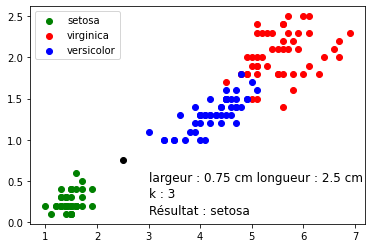

In [7]:
import pandas
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#traitement CSV
iris=pandas.read_csv("iris_bis.csv")
x=iris.loc[:,"petal_length"]
y=iris.loc[:,"petal_width"]
lab=iris.loc[:,"species"]
#fin traitement CSV

#valeurs
longueur=2.5 #on définit la longueur de la pétale,
largeur=0.75 #sa largeur en cm,
k=3 #et le nb de résultats plus proches.
# EX : Pour longueur=2,5cm, largeur=0,75cm :
# Si k=3, le résultat est l'Iris setosa, mais si k=5, le résultat sera l'Iris versicolor.
#fin valeurs

#graphique
plt.scatter(x[lab == 0], y[lab == 0], color='g', label='setosa')
plt.scatter(x[lab == 1], y[lab == 1], color='r', label='virginica')
plt.scatter(x[lab == 2], y[lab == 2], color='b', label='versicolor')
plt.scatter(longueur, largeur, color='k')
plt.legend()
#fin graphique

#algo knn
d=list(zip(x,y))
model = KNeighborsClassifier(n_neighbors=k)
model.fit(d,lab)
prediction= model.predict([[longueur,largeur]])
#fin algo knn

#Affichage résultats
txt="Résultat : "
if prediction[0]==0:
    txt=txt+"setosa"
if prediction[0]==1:
    txt=txt+"virginica"
if prediction[0]==2:
    txt=txt+"versicolor"
plt.text(3,0.5, f"largeur : {largeur} cm longueur : {longueur} cm", fontsize=12)
plt.text(3,0.3, f"k : {k}", fontsize=12)
plt.text(3,0.1, txt, fontsize=12)
#fin affichage résultats

plt.show()

0.9884572072072073


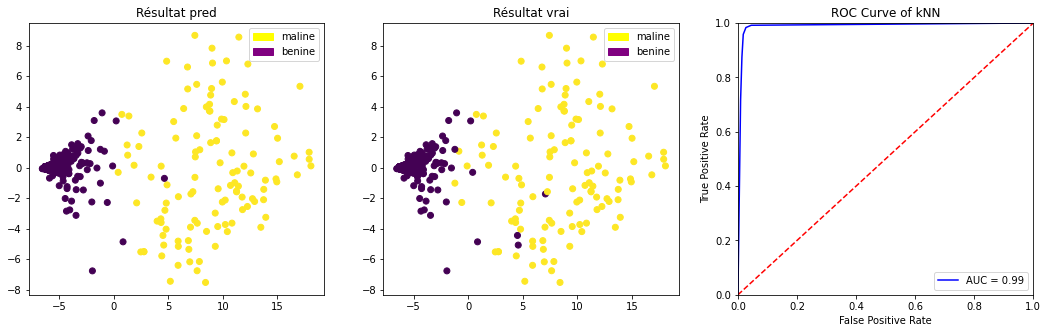

Matrice de confusion :
[[218   4]
 [  5 115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       222
           1       0.97      0.96      0.96       120

    accuracy                           0.97       342
   macro avg       0.97      0.97      0.97       342
weighted avg       0.97      0.97      0.97       342

Accuracy : 0.9736842105263158


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import matplotlib.patches as mpatches
import numpy as np
import scipy.io as sp
from sklearn.decomposition import PCA

#traitement mat
cancercell=sp.loadmat('breastw.mat')
X = cancercell['X']
y = cancercell['y']
#print(cancercell)
y=np.reshape(y,(683,))
#Séparation des données d'apprentissage et des données tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
#fin traitement mat

#valeurs
k=5
# fin valeurs

#algo knn
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train,y_train)
prediction= model.predict(X_test)
model_PCA = PCA(n_components=2)
data_reduced = model_PCA.fit_transform(X_test)
#fin algo knn

#print(model.predict_proba(X_test))
X_scores = model.predict_proba(X_test)
y_scores = model.predict_proba(X_test)


#graphique
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=prediction)
plt.title("Résultat pred")
maline = mpatches.Patch(color='yellow', label='maline')
benine = mpatches.Patch(color='purple', label='benine')
plt.legend(handles=[maline,benine])

plt.subplot(1, 3, 2)
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=y_test)
plt.title("Résultat vrai")
maline = mpatches.Patch(color='yellow', label='maline')
benine = mpatches.Patch(color='purple', label='benine')
plt.legend(handles=[maline,benine])

#  ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.subplot(1, 3, 3)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

"""""
random_probs = [0 for _ in range(len(y_test))]
# calculate AUC
model_auc = roc_auc_score(y_test, X_scores)
# summarize score
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate ROC Curve
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
# For the actual model
model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
# Plot the roc curve for the model and the random model line
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.plot(model_fpr, model_tpr, marker='.', label='Model')
# Create labels for the axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()
"""
#fin graphique

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, prediction)
print("Matrice de confusion :")
print(result)
result1 = classification_report(y_test, prediction)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,prediction)
print("Accuracy :",result2)
